In [4]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns

def simulate_sample(true_effect, n, seed=None):
    rng = np.random.default_rng(seed=seed)
    cov = np.array([[1, true_effect],
                    [true_effect, 1]])
    #discovery
    y, yhat = zip(*rng.multivariate_normal(mean=[0,0], cov=cov, size=n))
    stat1 = pearsonr(x=y, y=yhat)

    # replication
    y, yhat = zip(*rng.multivariate_normal(mean=[0,0], cov=cov, size=n))
    stat2 = pearsonr(x=y, y=yhat)

    return stat1[1]/2, stat2[1]/2   # one-sided

In [5]:
alpha=0.05
n_iter = 1000
true_effects = np.logspace(-2,0,10)
ns = np.logspace(1,3,10).astype(int)

df = pd.DataFrame(columns=['p_rep', 'n', 'true_r2'])

for true_r in true_effects:
    print(true_r)
    for n in ns:
        p1s = np.zeros(n_iter)
        p2s = np.zeros(n_iter)
        for iter in range(n_iter):
            p1, p2 = simulate_sample(true_r, n=n)
            p1s[iter] = p1
            p2s[iter] = p2
        p_rep = np.sum(p2s[p1s<alpha]<alpha)/np.sum(p1s<alpha)
        if p_rep>0.8:
            df.loc[len(df.index)] = [p_rep, n, true_r*true_r]
            break

df

0.01
0.016681005372000592
0.027825594022071243
0.046415888336127774
0.0774263682681127
0.1291549665014884
0.21544346900318834
0.3593813663804626
0.5994842503189409
1.0


,p_rep,n,true_r2
0,0.803995,359.0,0.016681
1,0.809403,129.0,0.046416
2,0.805627,46.0,0.129155
3,0.858525,16.0,0.359381
4,1.000000,10.0,1.000000


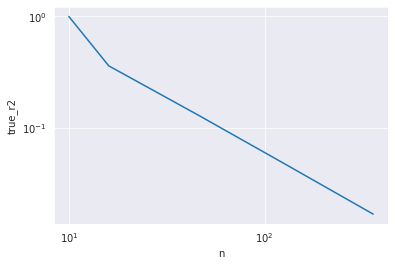

In [6]:
ax=sns.lineplot(data=df, x='n', y='true_r2')
ax.loglog(True)

In [7]:
from scipy.stats import norm
r = 0.5
n=100

z = np.arctanh(r)
norm.interval([0.95], loc=z, scale=1/np.sqrt(n-3))

(array([0.35030195]), array([0.74831034]))

In [8]:
import statsmodels.stats.power as smp
transf = lambda r, n: np.arctanh(r)+r/(2.*(n-1))
[smp.NormalIndPower().solve_power(np.arctanh(r), alpha=0.05, ratio=0,
            power= 0.8, alternative='two-sided') + 3 for r in [0.3, 0.5, 0.1]]

[84.92761044616469, 29.01223670641077, 782.6482175199623]

In [9]:
import statsmodels.stats.power as smp

true_effects = np.logspace(np.log(0.23),0,20, endpoint=False)

n_rep = [smp.NormalIndPower().solve_power(np.arctanh(r), alpha=0.05*0.05*2, ratio=0,
            power= 0.8, alternative='larger') + 3 for r in true_effects]
n_rep

[10152.001766984604,
 7236.050547314269,
 5157.250542505102,
 3675.2607405548974,
 2618.7405019017388,
 1865.5399624034374,
 1328.5776423103227,
 945.7724955166505,
 672.8663939867668,
 478.30720568404064,
 339.60087555224635,
 240.71074773510136,
 170.20343692606727,
 119.92685648625017,
 84.06749879095432,
 58.477803809399134,
 40.19542075785188,
 27.097329627814133,
 17.64315068994928,
 10.64366898990942]

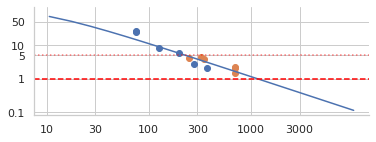

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(6, 2)})
sns.set_style("whitegrid")
ax = sns.lineplot(x=n_rep, y=np.square(true_effects))
ax.loglog(True)
ax.axhline(0.05, color='red', linestyle=':', alpha=0.5)
ax.axhline(0.01, color='red', linestyle='--')
ax.set_xticks([10, 30, 100,300,1000,3000])
ax.set_xticklabels([10, 30, 100,300,1000,3000])
ax.set_yticks([0.001, 0.01, 0.05, 0.1, 0.5])
ax.set_yticklabels([0.1, 1, 5,10,50])
ax.scatter(x=[75, 75, 125, 200, 275, 375], y=[0.26, 0.25, 0.081, 0.058, 0.028, 0.021])
ax.scatter(x=[250, 350, 325, 700, 700, 700], y=[0.042, 0.039, 0.044, 0.021, 0.022, 0.015])
sns.despine()
plt.savefig('fig/analitical_solution.pdf')

In [11]:
from scipy.stats import binom
binom.pmf(2, n=2,p=0.05)

0.0025000000000000005

In [ ]:
0.05*0.05

In [ ]:
np.log(0.1)

In [ ]:
true_effects**2

In [92]:
np.log(0.1)

-2.3025850929940455

In [95]:
true_effects**2

array([0.01      , 0.01584893, 0.02511886, 0.03981072, 0.06309573,
       0.1       , 0.15848932, 0.25118864, 0.39810717, 0.63095734])